<a href="https://colab.research.google.com/github/cartmarsh/TwitterSentiment/blob/main/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 162MB/s]


In [ ]:
!pwd
!ls

/content
kaggle.json  sample_data  sentiment-analysis-on-movie-reviews.zip


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
train_fname = 'data/train.tsv.zip'
test_name = 'data/test.tsv.zip'
sub = 'data/sampleSubmission.csv'

In [ ]:
sub_df = pd.read_csv(sub)

In [ ]:
print(sub_df.head())

   PhraseId  Sentiment
0    156061          2
1    156062          2
2    156063          2
3    156064          2
4    156065          2


In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df.Phrase.sample(10).values

array(['moving and solidly entertaining comedy\\/drama',
       'bug-eyed mugging',
       "Screenwriter Chris ver Weil 's directing debut is good-natured and never dull",
       'speak for it while it forces you to ponder anew what a movie can be .',
       'of Americans', 'intriguing what-if premise', 'feel like a sucker',
       'no solace here , no entertainment value ,', 'fresh air',
       'the frank humanity'], dtype=object)

In [ ]:
test_df = pd.read_csv(test_name, sep='\t')

In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


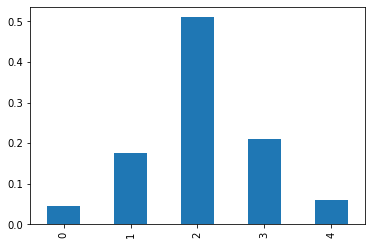

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem('breaking')

'break'

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenize('Is this (the) real life, or is it;fanatasy')

['is', 'this', 'the', 'real', 'life', 'or', 'is', 'it', 'fanatasi']

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
selected_stopwords = english_stopwords[:125]


In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words = selected_stopwords,
                             ngram_range=(1,3),
                             max_features=2000)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fc604014e60>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'affirm', 'afraid', 'age', 'ago', 'ahead', 'aim',
       'aimless', 'air', 'alien', 'aliv', 'allen', 'allow', 'almost',
       'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway',
       'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti', 'america',
       'american', 'among', 'amount', 'amus', 'analyz', 'angel', 'angst',
       'ani', 'anim', 'ann', 'annoy', 'anoth', 'answer', 'antwon',
       'anyon', 'anyth', 'apart', 'appar', 'appeal', 'appear', 'appli',
       'appreci', 'approach', 'appropri', 'area', 'argu', 'argument',
       'aro

In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27620188, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33022325, 0.29314979, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape

(110000, 2000)

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(class_weight=None, solver="newton-cg")

In [ ]:
distribution = raw_df.Sentiment.value_counts(normalize=True).sort_index()
print(distribution)

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


In [ ]:
model.fit(train_inputs, train_targets)

LogisticRegression(solver='newton-cg')

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6350090909090909

In [ ]:
model.score(train_inputs, train_targets)

0.6350090909090909

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5764437689969605

In [ ]:
small_df = raw_df.sample(30)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
53024,53025,2629,to cause his audience an epiphany,2
3385,3386,127,dared to mess,2
138483,138484,7500,Liyan,2
95579,95580,4991,A poignant comedy that offers food for,3
125495,125496,6743,hyped up,2
27676,27677,1270,in the middle,2
130405,130406,7025,punctuated with graphic violence,2
4928,4929,191,wo n't be disappointed,3
107103,107104,5658,sinks .,1
150149,150150,8178,"no character , loveable or otherwise",0


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 2])

In [ ]:
sub_preds = model.predict(test_inputs)

In [ ]:
sub_preds[20:300]

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3])

In [ ]:
sub_df.Sentiment = sub_preds

In [ ]:
sub_df.to_csv('submission3.csv', index=None)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

### Train Logistic Regression Model



### Study Predictions on Sample Inputs

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1 = MultinomialNB()

In [ ]:
model1.fit(train_inputs, train_targets)

MultinomialNB()

### Model 2

In [ ]:
model1.score(train_inputs, train_targets)

0.5838454545454546

### Model 3

Best Model:

??? 

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
